## Jose Andres Hernandez Guerra 20053

### Laboratorio #6 – Análisis de tráfico, implementación de un IDS
#### Semestre I - 2024

Las herramientas sniffer (pasivas) como Wireshark permiten la captura de tráfico de red para su
posterior análisis. Con esta información se puede analizar aspectos de la red como la eficiencia y
optimización del rendimiento (cuellos de botella), pero también se pueden detectar anomalías que
sugieren un análisis profundo para descartar posibles ataques.

Para este ejercicio se utilizará el archivo analisis_paquetes.pcap, disponible en CANVAS. Trabaje el
laboratorio en un jupyter notebook.

1. Instale la librería scapy: https://scapy.net/
2. Capture 25 paquetes de su red doméstica (no de la red de la UVG) y asignelos a una variable.
3. Imprima el tipo de variable, la longitud y el contenido del variable.
4. Imprima el tipo de dato del primer paquete capturado.
5. Imprima el contenido de 5 paquetes.

In [18]:
from scapy.all import *

cantidad_de_paquetes = 25

pcap = sniff(count=cantidad_de_paquetes)

for paquete in pcap:

    print(f"Paquete no. {pcap.index(paquete) + 1} siendo analizado:")

    # Imprimir el tipo de variable que es paquete

    print(type(paquete))

    # Imprimir la longitud del paquete

    print(len(paquete))

    # Imprimir el contenido del paquete capturado

    print(paquete)


Paquete no. 1 siendo analizado:
<class 'scapy.layers.l2.Ether'>
86
Ether / IP / UDP / DNS Ans "140.82.114.3" 
Paquete no. 2 siendo analizado:
<class 'scapy.layers.l2.Ether'>
78
Ether / IP / TCP 192.168.0.138:51620 > 140.82.114.3:https S
Paquete no. 3 siendo analizado:
<class 'scapy.layers.l2.Ether'>
42
Ether / ARP who has 192.168.0.165 says 192.168.0.1
Paquete no. 4 siendo analizado:
<class 'scapy.layers.l2.Ether'>
74
Ether / IP / TCP 140.82.114.3:https > 192.168.0.138:51620 SA
Paquete no. 5 siendo analizado:
<class 'scapy.layers.l2.Ether'>
66
Ether / IP / TCP 192.168.0.138:51620 > 140.82.114.3:https A
Paquete no. 6 siendo analizado:
<class 'scapy.layers.l2.Ether'>
386
Ether / IP / TCP 192.168.0.138:51620 > 140.82.114.3:https PA / Raw
Paquete no. 7 siendo analizado:
<class 'scapy.layers.l2.Ether'>
1490
Ether / IP / TCP 140.82.114.3:https > 192.168.0.138:51620 A / Raw
Paquete no. 8 siendo analizado:
<class 'scapy.layers.l2.Ether'>
1490
Ether / IP / TCP 140.82.114.3:https > 192.168.0.138

In [19]:
# Imprimir el tipo de dato del primer paquete capturado

print(type(pcap[0]))

# Imprimir el contenido de 5 paquetes capturados

for paquete in pcap[:5]:

    print(paquete)

<class 'scapy.layers.l2.Ether'>
Ether / IP / UDP / DNS Ans "140.82.114.3" 
Ether / IP / TCP 192.168.0.138:51620 > 140.82.114.3:https S
Ether / ARP who has 192.168.0.165 says 192.168.0.1
Ether / IP / TCP 140.82.114.3:https > 192.168.0.138:51620 SA
Ether / IP / TCP 192.168.0.138:51620 > 140.82.114.3:https A


1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
2. Convierta la variable a un DataFrame.
3. Muestre el contenido de las primeras 5 filas del dataset.
4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.
5. Estadísticas
a. Muestre todas las IP origen
b. Muestre todas las IP destino
c. ¿Cuál es la IP origen más frecuente?
i. ¿A qué IP destino se comunica con más frecuencia?
ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
iii. ¿Desde que puertos origen se comunica?

In [25]:
# 1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.
# 2. Convierta la variable a un DataFrame.
# 3. Muestre el contenido de las primeras 5 filas del dataset.
# 4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.
# 5. Estadísticas
# a. Muestre todas las IP origen
# b. Muestre todas las IP destino
# c. ¿Cuál es la IP origen más frecuente?
# i. ¿A qué IP destino se comunica con más frecuencia?
# ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
# iii. ¿Desde que puertos origen se comunica?

# 1. Descargue e archivo analisis_paquetes.pcap y asignelo a una variable.

pcap = rdpcap("analisis_paquetes.pcap")

# 2. Convierta la variable a un DataFrame.

from scapy.layers.inet import IP, TCP, UDP

# Obtener los campos de la capa 2
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

# Concatenar campos
fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']


import pandas as pd
import binascii
# Obtener los campos de la capa 2
ip_fields = [field.name for field in IP().fields_desc]
tcp_fields = [field.name for field in TCP().fields_desc]
udp_fields = [field.name for field in UDP().fields_desc]

# Concatenar campos
fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex']

# Crear un DataFrame vacío
df = pd.DataFrame(columns=fields)

# Rellenar el DataFrame con los paquetes capturados
for packet in pcap[IP]:
    # Obtenemos los valores de los campos de cada fila
    field_values = []
    # A;adimos todos los valores de los campos de IP al df
    for field in ip_fields:
        if field == 'options':
            # Obtenemos el numero de opciones del IP Header
            field_values.append(len(packet[IP].fields[field]))
        else:
            field_values.append(packet[IP].fields[field])

    field_values.append(packet.time)

    layer_type = type(packet[IP].payload)
    for field in tcp_fields:
        try:
            if field == 'options':
                field_values.append(len(packet[layer_type].fields[field]))
            else:
                field_values.append(packet[layer_type].fields[field])
        except:
            field_values.append(None)

    # Agregamos el payload
    field_values.append(len(packet[layer_type].payload))
    field_values.append(packet[layer_type].payload.original)
    field_values.append(binascii.hexlify(packet[layer_type].payload.original))
    # Agregamos la fila al df
    df_append = pd.DataFrame([field_values], columns=fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")


# 3. Muestre el contenido de las primeras 5 filas del dataset.

print(df.head())

# 4. Muestre los valores de las columnas: Src Addres, Dst Address, Src Port y Dst Port.

print(df[['src', 'dst', 'sport', 'dport']])



  version ihl tos   len     id flags frag  ttl proto chksum  ... dataofs  \
0       4   5   0   961      1          0   64    17  21222  ...    None   
1       4   5  32    84  58919          0  122    17  13836  ...    None   
2       4   5   0   975      1          0   64    17  21208  ...    None   
3       4   5  32    84  59493          0  122    17  13262  ...    None   
4       4   5   0  1012      1          0   64    17  21171  ...    None   

  reserved flags window chksum urgptr options payload  \
0     None  None   None  62990   None    None     933   
1     None  None   None  65061   None    None      56   
2     None  None   None  36378   None    None     947   
3     None  None   None  65063   None    None      56   
4     None  None   None  63846   None    None     984   

                                         payload_raw  \
0  b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00...   
1  b'\x00\x0c\x81\x80\x00\x01\x00\x01\x00\x00\x00...   
2  b'\x00\x0c\x01\x00\x00\x01\x0

In [27]:
# 5. Estadísticas

# a. Muestre todas las IP origen

print("Mostrando todas las IP origen")

print(df['src'].unique())

# b. Muestre todas las IP destino

print("Mostrando todas las IP destino")

print(df['dst'].unique())

# c. ¿Cuál es la IP origen más frecuente?

print("¿Cuál es la IP origen más frecuente?")

print(df['src'].value_counts().idxmax())

# i. ¿A qué IP destino se comunica con más frecuencia?

print("¿A qué IP destino se comunica con más frecuencia?")

print(df[df['src'] == df['src'].value_counts().idxmax()]['dst'].value_counts().idxmax())

# ii. ¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?

print("¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?")

print(df[df['src'] == df['src'].value_counts().idxmax()]['dport'].value_counts().idxmax())

# iii. ¿Desde que puertos origen se comunica?

print("¿Desde que puertos origen se comunica?")

print(df[df['src'] == df['src'].value_counts().idxmax()]['sport'].unique())

Mostrando todas las IP origen
['10.1.10.53' '84.54.22.33' '75.75.75.75']
Mostrando todas las IP destino
['84.54.22.33' '10.1.10.53' '75.75.75.75']
¿Cuál es la IP origen más frecuente?
10.1.10.53
¿A qué IP destino se comunica con más frecuencia?
84.54.22.33
¿A que puerto destino se comunica? ¿Cuál es el propósito de este puerto?
53
¿Desde que puertos origen se comunica?
[53 15812 23903]


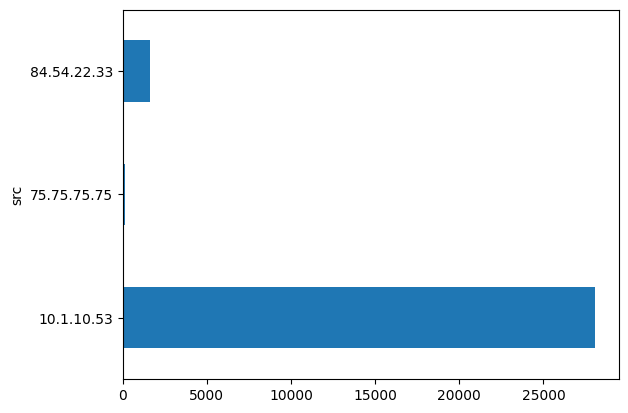

In [28]:
# Gráficas
# a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la
# suma de los payloads (bytes) enviados desde dichas direcciones.
# b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X
# la suma de los payloads (bytes) recibidos en dichas direcciones.
# c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el
# eje X la suma de los payloads (bytes) enviados de dichos puertos.
# d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el
# eje X la suma de los payloads (bytes) recibidos en dichos puertos.
# e. Genere una gráfica de barras 2D verticales, en el eje Y la suma de los payload, en el
# eje X el tiempo, para la IP origen más frecuente.
# f. Utilizando la información de las estadísticas y la información del comportamiento del
# tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
# el comportamiento?

import matplotlib.pyplot as plt

# a. Genere una gráfica de barras 2D horizontales, en el eje Y las IPs origen, y en el eje X la

# suma de los payloads (bytes) enviados desde dichas direcciones.

df.groupby('src')['payload'].sum().plot(kind='barh')

plt.show()

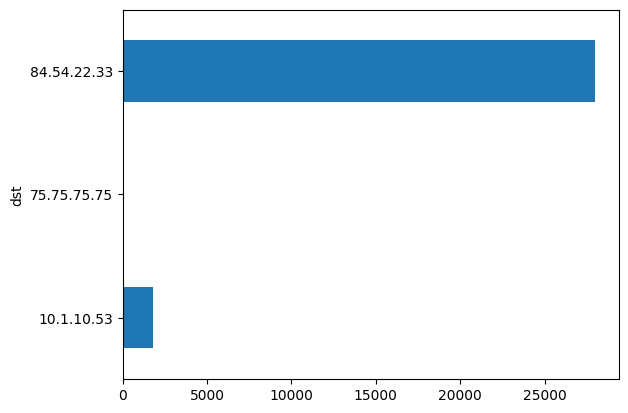

In [29]:
# b. Genere una gráfica de barras 2D horizontales, en el eje Y las IP destino, y en el eje X

# la suma de los payloads (bytes) recibidos en dichas direcciones.

df.groupby('dst')['payload'].sum().plot(kind='barh')

plt.show()

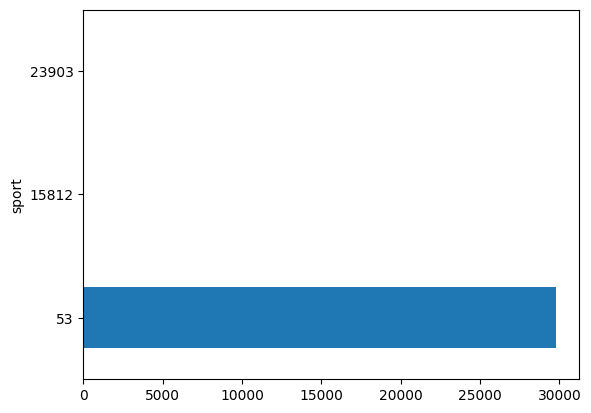

In [30]:
# c. Genere una gráfica de barras 2D horizontales, en el eje Y los puertos origen, y en el

# eje X la suma de los payloads (bytes) enviados de dichos puertos.

df.groupby('sport')['payload'].sum().plot(kind='barh')

plt.show()


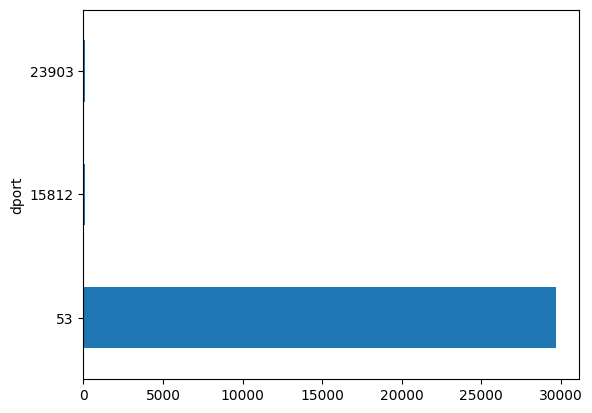

In [31]:
# d. Genere una gráfica 2D de barras horizontales, en el eje Y los puertos destino, y en el

# eje X la suma de los payloads (bytes) recibidos en dichos puertos.

df.groupby('dport')['payload'].sum().plot(kind='barh')

plt.show()

##### f. Utilizando la información de las estadísticas y la información del comportamiento del
##### tráfico que las gráficas muestran, describa que es lo que está sucediendo. ¿Es común
##### el comportamiento?

Considerando que estoy en mi red local a la que me referire como red domestica:

IP de origen más frecuente: La IP 10.1.10.53 es la fuente de tráfico más frecuente. Es probable que sea un dispositivo en tu red local, ya que se encuentra dentro del espacio de direcciones IP privadas comúnmente utilizado para redes de área local. El alto volumen de tráfico que proviene de esta IP podría indicar que es un dispositivo principal, como un servidor o una computadora que se utiliza mucho para el acceso a Internet o la comunicación de red local.

IP de destino más frecuente: La IP 84.54.22.33 es el destino más frecuente. Podría ser un servicio externo o un sitio web al que los dispositivos en la red local están accediendo. El hecho de que una única IP externa sea el destino dominante sugiere que hay un servicio o sitio específico que se utiliza más que otros, lo cual podría ser común para actividades como transmisión de medios, juegos en línea o uso de un servicio en la nube en particular.

Comunicación frecuente con el puerto de destino 53: El puerto 53 se utiliza para los servicios del Sistema de Nombres de Dominio (DNS), que son esenciales para traducir nombres de dominio a direcciones IP. La alta frecuencia de comunicación con este puerto sugiere que hay mucha actividad de navegación web o relacionada con Internet, ya que las búsquedas de DNS son una parte normal del acceso a Internet.

Puertos de origen utilizados para la comunicación: Los puertos de origen 53, 15812 y 23903 muestran que hay tráfico que proviene del puerto 53, lo que podría ser una respuesta del servidor DNS si es un servidor DNS, o posiblemente software mal configurado. Los otros puertos son de número alto y podrían ser puertos efímeros que se utilizan típicamente para la comunicación del lado del cliente.

Análisis del Comportamiento del Tráfico:

Si consideramos un escenario de red doméstica, es común que uno o unos pocos dispositivos generen la mayor parte del tráfico, especialmente si se utilizan para actividades que consumen muchos datos, como ver videos en streaming o jugar en línea.

Las solicitudes frecuentes de DNS (tráfico del puerto 53) también son típicas en una red doméstica porque cada nuevo dominio visitado o servicio de Internet utilizado generalmente desencadena una búsqueda de DNS.
La combinación de solicitudes frecuentes a una IP externa particular y el alto tráfico de DNS podría indicar un comportamiento rutinario, como alguien en el hogar visitando un conjunto específico de sitios web o utilizando un servicio en línea con frecuencia.
¿Es Común Este Comportamiento?

Sí, para una red doméstica, el comportamiento que has descrito es bastante común. Sin embargo, si este comportamiento se desvía significativamente de los patrones de uso normales o si hay preocupaciones sobre el acceso no autorizado, podría justificar una investigación más profunda.

In [33]:
# Investigación del payload
# a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen
# más frecuente.
# b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y
# agrúpelas por dst y la suma del payload,
# c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta
# IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.
# d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.
# e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.
# f. Muestre el contenido del array.
# g. Observe los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido
# que se envíe al puerto destino? Describa lo que encontró.

# a. Cree un nuevo DF que incluya únicamente las conexiones con la dirección IP origen

# más frecuente.

df_sospechosa = df[df['src'] == df['src'].value_counts().idxmax()]

# b. Cree un nuevo DF que utilice el DF anterior con las columnas src, dst y payload y

# agrúpelas por dst y la suma del payload,

df_sospechosa = df_sospechosa[['src', 'dst', 'payload']].groupby('dst').sum()

# c. Obtenga la IP destino que más ha intercambiado bytes con la IP más frecuente. Esta

# IP es sospechosa por la cantidad de bytes intercambiados, entre todas las direcciones.

ip_sospechosa = df_sospechosa['payload'].idxmax()

# d. Cree un nuevo DF con la conversación entre la IP más frecuente y la IP sospechosa.

df_sospechosa = df[(df['src'] == df['src'].value_counts().idxmax()) & (df['dst'] == ip_sospechosa)]

# e. Obtenga los payloads del DF del inciso anterior, y añada cada uno en un array.

payloads = df_sospechosa['payload_raw'].values

# f. Muestre el contenido del array.

print(payloads)


[b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x06google\x03com\x00\x00\x1c\x00\x01\xef\xbf\xbdPNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01b\x00\x00\x00\xef\xbf\xbd\x08\x06\x00\x00\x00(\xef\xbf\xbdTR\x00\x00:\xef\xbf\xbdIDATx\xef\xbf\xbd\xef\xbf\xbd\t|T\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd;K\x12\x08;\x08\xef\xbf\xbd\nE\xef\xbf\xbd\xef\xbf\xbd$\x19\xef\xbf\xbd\xef\xbf\xbdZi\xdf\xaa-\xef\xbf\xbd;N2\xef\xbf\xbd\xef\xbf\xbdV\xef\xbf\xbdV\xef\xbf\xbda\xef\xbf\xbdZ\x11!\xef\xbf\xbd\xef\xbf\xbd\x01\xdc\xbbik[\xef\xbf\xbd.ok\xef\xbf\xbde\xef\xbf\xbd\x01\\\xef\xbf\xbd\xef\xbf\xbd]\xef\xbf\xbd-\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbdd\xef\xbf\xbd\x08\xef\xbf\xbd\x08\xef\xbf\xbd\xef\xbf\xbdg\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd<\xef\xbf\xbd\xef\xbf\xbdL\x12\xef\xbf\xbd$3wf\xef\xbf\xbd\xef\xbf\xbd\x02<_\r\xef\xbf\xbdY\xef\xbf\xbdr\xef\xbf\xbd\xef\xbf\xbdy\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\x1c\r\x18\xef\xbf\xbd8c\xef\xbf\xbdew\r\x1e\xef\xbf\xbd\xef\xbf\xbd\xef\xbf\xbd\xef\xb

In [34]:
# g. Observe los primeros bytes del contenido, ¿encuentra algún dato que no haga sentido

# que se envíe al puerto destino? Describa lo que encontró.

for payload in payloads:

    print(payload[:10])

b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x00\x00\x00'
b'\x00\x0c\x01\x00\x00\x01\x00\x